# FGV Introduction to Data Science Bootcamp: Big Data Lab
## Analyzing relationships between NYC taxi trips and weather

In [1]:
from datetime import datetime
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
%matplotlib inline
# this makes the output of plotting commands be displayed inline
import matplotlib.pyplot as plt

### Reading the Taxi Data

In [2]:
# Order of attributes: time, n. trips, avg miles, avg duration (seconds)
taxi_data = pd.read_csv('Data/taxi_2012.csv', header=0)
# In the original data time is represented in secs since epoch time
# Convert to Python date-time -- provides the ability to analyze data over days, hours, etc.
taxi_data['time'] = pd.to_datetime(taxi_data['time'], unit='s')
# create an index to speed up access
taxi_data.index = taxi_data['time']
# since index already has this information, we can delete the column in the dataframe
del taxi_data['time']

In [3]:
taxi_data.head()

,n_trips,avg_miles,avg_duration[s]
time,,,
2012-01-01 00:00:00,14474.0,2.932867,764.10550
2012-01-01 01:00:00,15225.0,3.099577,819.52985
2012-01-01 02:00:00,13908.0,3.216513,790.59170
2012-01-01 03:00:00,12030.0,3.312311,744.66876
2012-01-01 04:00:00,9233.0,3.556351,713.47730


#### There is a Panda package that supports profiling -- this can be useful for data cleaning. 
#### See: https://pypi.python.org/pypi/pandas-profiling/1.4.0
#### For more info on how to profile data with Pandas, see https://www.datacamp.com/community/tutorials/python-data-profiling

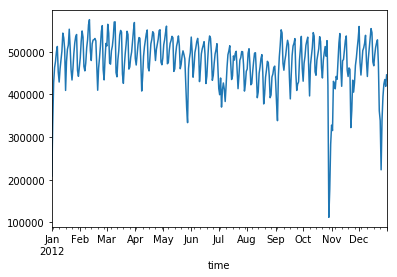

In [4]:
# plotting number of taxi trips per day

# to plot number of trips per day, we need to group all trips per day
# using resample('D') and adding all trips using sum()
taxi_data['n_trips'].resample('D').sum().plot()
# Aggregate by month
#taxi_data['n_trips'].resample('M').sum().plot()

### Reading the Weather Data

In [3]:
# order of attributes: time, wind speed (m/s), avg precipitation (ml), avg snow depth (cm)

weather_data = pd.read_csv('Data/weather_2012.csv', header=0)
weather_data.rename(columns={'time[s]': 'time'}, inplace=True)
weather_data['time'] = pd.to_datetime(weather_data['time'], unit='s')
weather_data.index = weather_data['time']
del weather_data['time']

In [4]:
weather_data.head()

,avg_wind_speed[m_s],avg_precip[ml],avg_snow[cm]
time,,,
2012-01-01 00:00:00,5.7,0.0,0.0
2012-01-01 01:00:00,5.7,0.0,0.0
2012-01-01 02:00:00,5.7,0.0,0.0
2012-01-01 03:00:00,5.7,0.0,0.0
2012-01-01 04:00:00,3.1,0.0,0.0


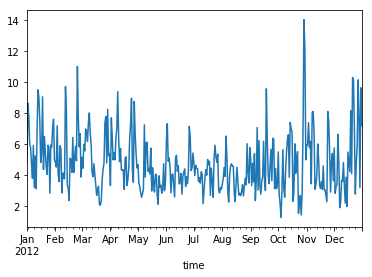

In [7]:
# plotting average wind speed per day
# note that unline trips, here we use mean to aggregate wind speed

weather_data['avg_wind_speed[m_s]'].resample('D').mean().plot()

### Joining Taxi and Weather Data Sets

In [6]:
taxi_weather = taxi_data.join(weather_data, how='inner', sort=True)

In [7]:
taxi_weather.head()

,n_trips,avg_miles,avg_duration[s],avg_wind_speed[m_s],avg_precip[ml],avg_snow[cm]
time,,,,,,
2012-01-01 00:00:00,14474.0,2.932867,764.10550,5.7,0.0,0.0
2012-01-01 01:00:00,15225.0,3.099577,819.52985,5.7,0.0,0.0
2012-01-01 02:00:00,13908.0,3.216513,790.59170,5.7,0.0,0.0
2012-01-01 03:00:00,12030.0,3.312311,744.66876,5.7,0.0,0.0
2012-01-01 04:00:00,9233.0,3.556351,713.47730,3.1,0.0,0.0


### Analyzing Correlations Between Taxi and Weather

#### All Possible Correlations

In [8]:
# find correlations between all columns
print(taxi_weather.corr())

# output does not say much... need to look at different slices!

                      n_trips  avg_miles  avg_duration[s]  \
n_trips              1.000000  -0.786759         0.418711   
avg_miles           -0.786759   1.000000        -0.323227   
avg_duration[s]      0.418711  -0.323227         1.000000   
avg_wind_speed[m_s]  0.159532  -0.180091        -0.028842   
avg_precip[ml]      -0.087629   0.090257         0.000351   
avg_snow[cm]        -0.008036   0.015219        -0.005887   

                     avg_wind_speed[m_s]  avg_precip[ml]  avg_snow[cm]  
n_trips                         0.159532       -0.087629     -0.008036  
avg_miles                      -0.180091        0.090257      0.015219  
avg_duration[s]                -0.028842        0.000351     -0.005887  
avg_wind_speed[m_s]             1.000000        0.006301      0.034725  
avg_precip[ml]                  0.006301        1.000000      0.003677  
avg_snow[cm]                    0.034725        0.003677      1.000000  


#### Correlation Between Number of Taxi Trips and Avg. Precipitation
Pearson Correlation: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Spearman Correlation: Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 


('Pearson correlation:', -0.087628822361239825)
('Spearman correlation:', -0.065821740086932895)


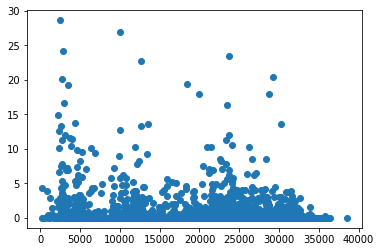

In [9]:
# for the entire time series

plt.scatter(taxi_weather['n_trips'], taxi_weather['avg_precip[ml]'])

print ("Pearson correlation:", pearsonr(taxi_weather['n_trips'].tolist(),
                                   taxi_weather['avg_precip[ml]'].tolist())[0])
print ("Spearman correlation:", spearmanr(taxi_weather['n_trips'].tolist(),
                                   taxi_weather['avg_precip[ml]'].tolist())[0])

('Pearson correlation:', -0.16434094185890058)
('Spearman correlation:', -0.13357912184569878)


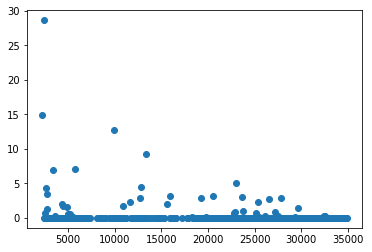

In [12]:
# consider only data in April, when it rains the most in NYC

# print taxi_weather[datetime(2012,4,1):datetime(2012,5,1)]['n_trips'].tolist()
print ("Pearson correlation:",
        pearsonr(taxi_weather[datetime(2012,4,1):datetime(2012,5,1)]['n_trips'].tolist(),
        taxi_weather[datetime(2012,4,1):datetime(2012,5,1)]['avg_precip[ml]'].tolist())[0])

print ("Spearman correlation:",
       spearmanr(taxi_weather[datetime(2012,4,1):datetime(2012,5,1)]['n_trips'].tolist(),
       taxi_weather[datetime(2012,4,1):datetime(2012,5,1)]['avg_precip[ml]'].tolist())[0])


plt.scatter(taxi_weather[datetime(2012,4,1):datetime(2012,5,1)]['n_trips'],
               taxi_weather[datetime(2012,4,1):datetime(2012,5,1)]['avg_precip[ml]'])

In [10]:
trip_stats = {'mean':taxi_weather['n_trips'].mean(),
              'std':taxi_weather['n_trips'].std(),
              'median':taxi_weather['n_trips'].median()}
# print trip_stats['mean']
# print taxi_weather['n_trips'].max()
# print taxi_weather['n_trips'].min()
print trip_stats

precip_stats = {'mean':taxi_weather['avg_precip[ml]'].mean(),
              'std':taxi_weather['avg_precip[ml]'].std(),
              'median':taxi_weather['avg_precip[ml]'].median()}
print(precip_stats)

print("Number of records:", taxi_weather['n_trips'].count())




{'std': 8866.0578614010465, 'median': 22336.0, 'mean': 19830.453831264942}
{'std': 1.240873860020123, 'median': 0.0, 'mean': 0.21529301735495981}
('Number of records:', 8783)


In [11]:
# correlation for values above mean
# note we are looking for an inverse correlation -- small number of taxi strips correlated with high precipitation
above_mean = taxi_weather[(taxi_weather['n_trips'] < trip_stats['mean']) & 
                          (taxi_weather['avg_precip[ml]'] > precip_stats['mean'])]
print ("Pearson for values above mean:",
       pearsonr(above_mean['n_trips'].tolist(), above_mean['avg_precip[ml]'].tolist()))

print ("Number of values above mean",above_mean['n_trips'].count())


('Pearson for values above mean:', (-0.10217652865313222, 0.0440069387770851))
('Number of values above mean', 389)


In [15]:
# correlation for values above median
above_median = taxi_weather[(taxi_weather['n_trips'] < trip_stats['median']) & 
                            (taxi_weather['avg_precip[ml]'] > precip_stats['median'])]
print ("Pearson for values above median:",
       pearsonr(above_median['n_trips'].tolist(), above_median['avg_precip[ml]'].tolist()))
print ("Spearman correlation:",
       spearmanr(above_median['n_trips'].tolist(), above_median['avg_precip[ml]'].tolist()))

print ("Number values above median",above_median['n_trips'].count())



('Pearson for values above median:', (-0.13115659161855348, 0.0025066949758942793))
('Spearman correlation:', SpearmanrResult(correlation=-0.13085954066097058, pvalue=0.0025644855771150498))
('Number values above median', 529)


In [12]:
# correlation for normal values 
remove_outliers = taxi_weather[
    (taxi_weather['n_trips'] > trip_stats['mean'] - 2*trip_stats['std']) & 
    (taxi_weather['n_trips'] < trip_stats['mean'] + 2*trip_stats['std']) &
    (taxi_weather['avg_precip[ml]'] > precip_stats['mean'] - 2*precip_stats['std']) &
    (taxi_weather['avg_precip[ml]'] < precip_stats['mean'] + 2*precip_stats['std'])
    ]
print("Correlation over data with outliers removed:", 
       pearsonr(remove_outliers['n_trips'].tolist(), remove_outliers['avg_precip[ml]'].tolist()))
print("Number of normal values", remove_outliers['n_trips'].count())



('Correlation over data with outliers removed:', (-0.046442498130126506, 1.7268891164775568e-05))
('Number of normal values', 8556)


('Only outliers and near outliers:', (-0.12136170781624016, 0.18116654163267656))
('Only outliers and near outliers:', SpearmanrResult(correlation=-0.12972328204308056, pvalue=0.15269945094522722))
('Number of values that are outliers and near outliers:', 123)


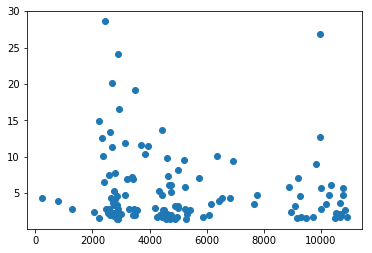

In [17]:
# correlation for outliers - 1 std deviation
outlier = taxi_weather[(taxi_weather['n_trips'] < trip_stats['mean'] - trip_stats['std']) & 
                       (taxi_weather['avg_precip[ml]'] > precip_stats['mean'] + precip_stats['std'])
                      ]
print("Only outliers and near outliers:",
      pearsonr(outlier['n_trips'].tolist(), outlier['avg_precip[ml]'].tolist()))
print("Only outliers and near outliers:",
       spearmanr(outlier['n_trips'].tolist(), outlier['avg_precip[ml]'].tolist()))

print("Number of values that are outliers and near outliers:",outlier['n_trips'].count())

plt.scatter(outlier['n_trips'],outlier['avg_precip[ml]'])






('Only outliers (2 std):', (-0.9492274641429379, 0.20373442372548936))
('Only outliers (2 std):', SpearmanrResult(correlation=-1.0, pvalue=0.0))
('Number of values that are outliers', 3)


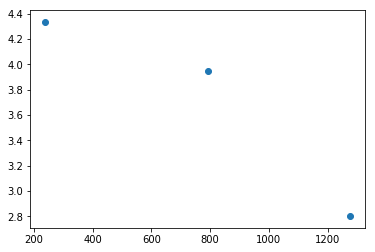

In [13]:
# Now, let's look at 2 std deviations
# What happens to the p-value?

outlier = taxi_weather[(taxi_weather['n_trips'] < trip_stats['mean'] - 2*trip_stats['std']) & 
                       (taxi_weather['avg_precip[ml]'] > precip_stats['mean'] + 2*precip_stats['std'])
                      ]

plt.scatter(outlier['n_trips'],outlier['avg_precip[ml]'])
print("Only outliers (2 std):",
      pearsonr(outlier['n_trips'].tolist(), outlier['avg_precip[ml]'].tolist()))
print("Only outliers (2 std):",
      spearmanr(outlier['n_trips'].tolist(), outlier['avg_precip[ml]'].tolist()))
print("Number of values that are outliers", outlier['n_trips'].count())


## Exercise 1: Correlation Between Taxi Trip Distance and Avg. Precipitation
#### Try slicing the data in different ways. Examine  different months  (e.g., use a for loop) and compute the correlation for different months.  Look at the distribution of trip distances and how it varies when there is and when there isn't precipitation

In [19]:
print pearsonr(taxi_weather['avg_miles'].tolist(),
               taxi_weather['avg_precip[ml]'].tolist())[0]

0.0902567235274


Let's further analyze the data. First, let's plot the two attributes.

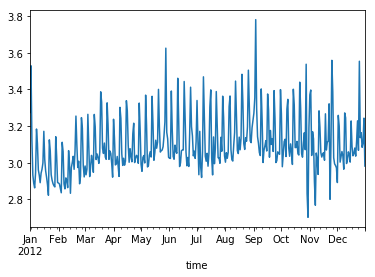

In [20]:
taxi_weather['avg_miles'].resample('D').mean().plot()

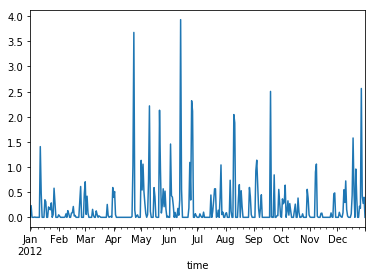

In [21]:
taxi_weather['avg_precip[ml]'].resample('D').mean().plot()

May and June look rainier. Let's now compute the correlation for each month of the year.

In [22]:
# tip: you can easily select each month from the taxi_weather table

# define a filter to select month 1, January
m = 1
filter_ = '2012-%d' % m
mean_taxi = taxi_weather[filter_]['avg_precip[ml]'].mean()
print(std_taxi)

m = 2
filter_ = '2012-%d' % m
mean_taxi = taxi_weather[filter_]['avg_precip[ml]'].mean()
print(mean_taxi)




NameError: name 'std_taxi' is not defined

Now, focus on the outliers (using 1 std deviation) for the correlation. Instead of detecting the outliers for the entire data,  detect them for each month, since, as we can see from the plot, each month has a different pattern.

In [ ]:
# insert your code here

Are the correlation values larger? Are they statistically significant?  

Sometimes it is also interesting to do other analysis, in addition to computing a correlation score. For instance, let's look at the distribution of taxi trip distance for points that are outliers and points that are not outliers.

In [ ]:
# distribution for outliers

mean = taxi_weather['avg_precip[ml]'].mean()
std = taxi_weather['avg_precip[ml]'].std()

# c = taxi_weather['avg_miles'][taxi_weather['avg_precip[ml]'] > mean + std]
# c.count()  # there are 340 rows

n, bins, patches = plt.hist(taxi_weather['avg_miles'][taxi_weather['avg_precip[ml]'] > mean + std], 50,
                            edgecolor='black',normed=1)


In [ ]:
# distribution for non-outliers

n, bins, patches = plt.hist(taxi_weather['avg_miles'][taxi_weather['avg_precip[ml]'] < mean + std], 50,
                            edgecolor='black',normed=1)

We can see that, in very rainy days, there are more taxi trips that are longer in distance, when compared to less rainy days.

## Exercise 2: Analyze the Correlation Between Average Trip Speed and Precipitation -- both rain and snow


First, let's compute the speed.

In [ ]:
# speed in miles/hour and add it as a new column in the table

taxi_weather['speed'] = # complete the code!

Now,  find the correlation.

In [ ]:
# W/ Precipitation



In [ ]:
# W/ Snow

                                   

What if we focus on outliers?

In [ ]:
taxi_weather['avg_snow[cm]'].plot()

Look at the snow data is too sparse: it only snowed in two days in 2012, apparently. Therefore, any analysis involving snow won't be significant. But what about precipitation?

In [ ]:
# loop for the different months and check!



## Bonus Exercise: Correlation Between N. Taxi Trips and Wind Speed
Try to identify outliers! 